# 03. Exploratory Data Analysis (EDA): Univariate & Bivariate Analysis

**Objective:** Perform univariate and bivariate EDA on the preprocessed dataset to uncover distributions, identify patterns, and explore relationships with the target variable `SEVERITY`.

**PRD References:** 2.2.2, 3.1.4; **FR2**; **NFR3**

## 1. Setup and Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

## 2. Load Preprocessed Data

In [11]:
data_path = '../data/processed/preprocessed_data.csv'
df = pd.read_csv(data_path)
print(f'Data loaded: {df.shape[0]} rows, {df.shape[1]} columns')

Data loaded: 22072 rows, 44 columns


### 2.1. Quick Peek

In [12]:
df.head()

,Y,X,hour,day_of_week,day,month,year,is_weekend,ROAD_EDSA,MAIN_CAUSE_Human error,MAIN_CAUSE_Other (see description),MAIN_CAUSE_Road defect,MAIN_CAUSE_Unknown,MAIN_CAUSE_Vehicle defect,COLLISION_TYPE_Angle Impact,COLLISION_TYPE_Head-On,COLLISION_TYPE_Hit Object,COLLISION_TYPE_Multiple,COLLISION_TYPE_No Collision Stated,COLLISION_TYPE_Rear-End,COLLISION_TYPE_Self-Accident,COLLISION_TYPE_Side Swipe,WEATHER_Unknown,WEATHER_clear-day,WEATHER_clear-night,WEATHER_cloudy,WEATHER_fog,WEATHER_partly-cloudy-day,WEATHER_partly-cloudy-night,WEATHER_rain,LIGHT_Unknown,LIGHT_day,LIGHT_dusk,LIGHT_night,REPORTING_AGENCY_MMDA Metrobase,REPORTING_AGENCY_MMDA Road Safety Unit,REPORTING_AGENCY_Other,season_Fall,season_Spring,season_Summer,season_Winter,desc_word_count,desc_contains_collision,SEVERITY
0,14.657714,121.019788,5,0,30,6,2014,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,30,1,0
1,14.657714,121.019788,1,0,17,3,2014,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,38,1,0
2,14.657714,121.019788,2,1,26,11,2013,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,30,1,1
3,14.657714,121.019788,13,5,26,10,2013,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,31,1,0
4,14.657706,121.019660,23,2,26,6,2013,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,32,1,1


## 3. Univariate Analysis

### 3.1. Numerical Features

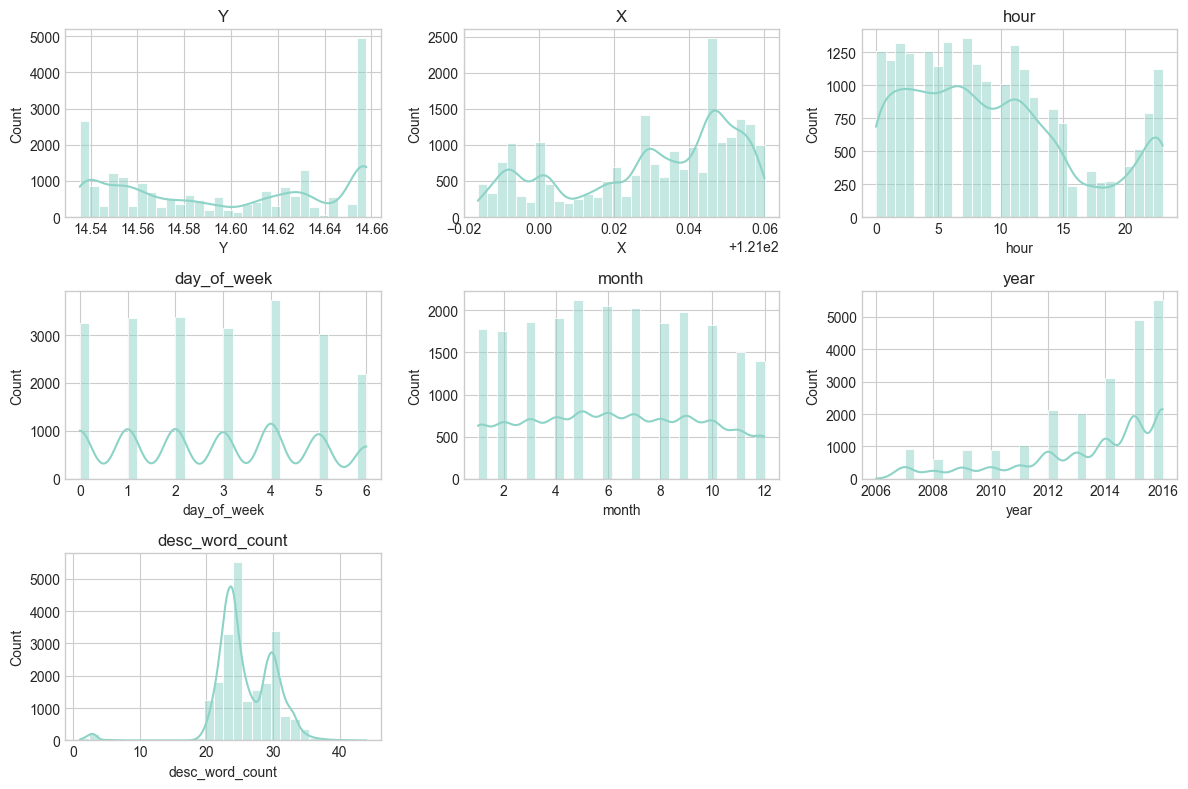

In [13]:
num_cols = ['Y', 'X', 'hour', 'day_of_week', 'month', 'year', 'desc_word_count']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

**Observations:**
- Distributions of continuous variables, presence of skewness or outliers.
- Note any unusual patterns or ranges.

### 3.2. Categorical Features

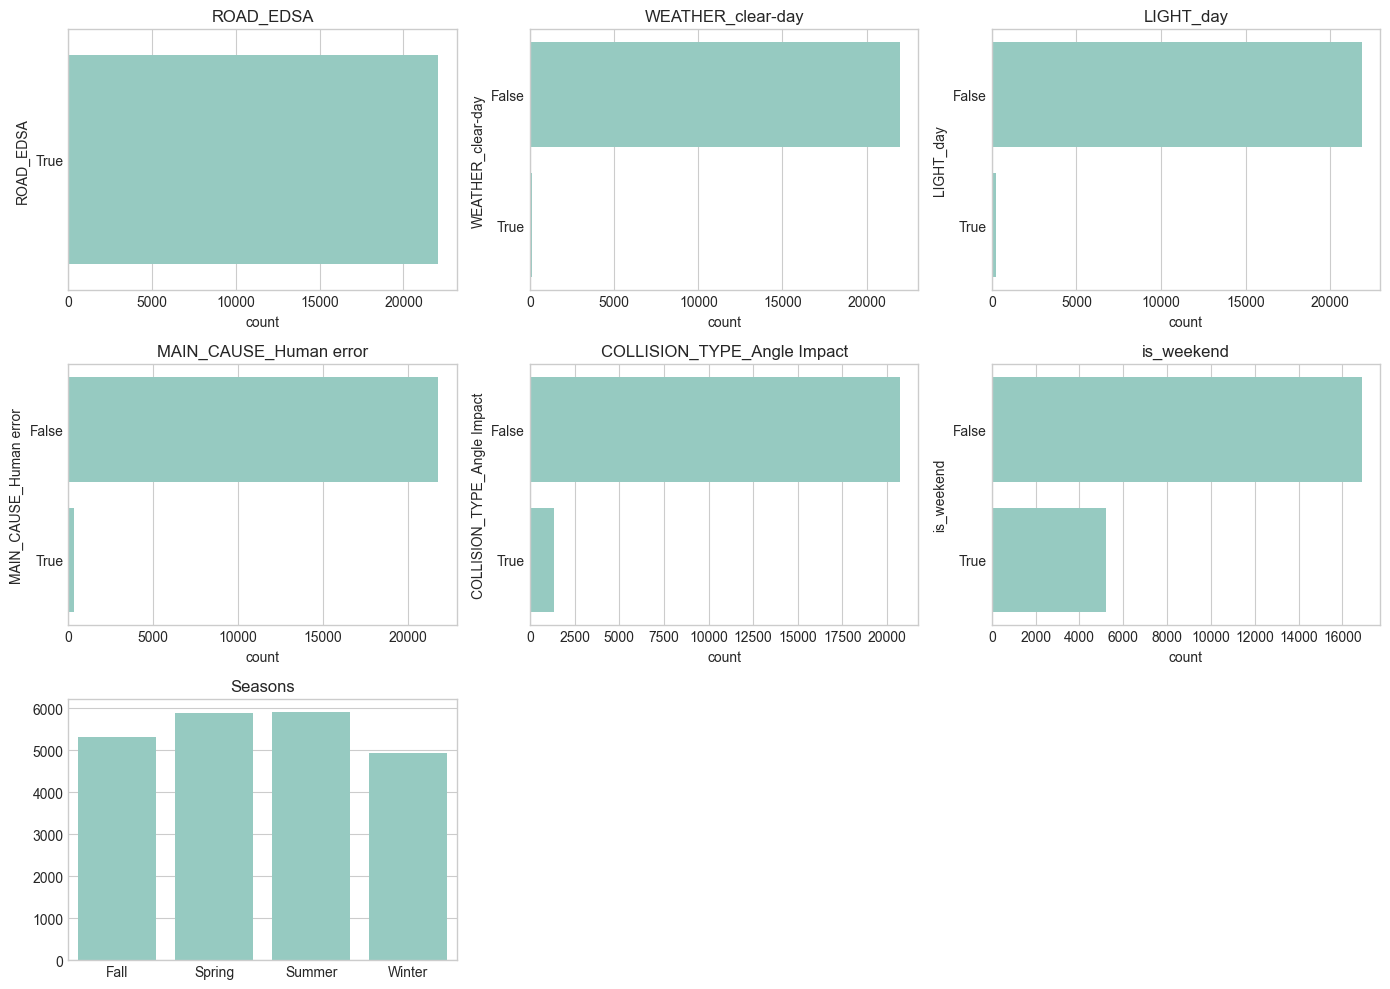

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot
cat_cols = [
    'ROAD_EDSA',  # Corrected column name
    'WEATHER_clear-day',  # Example corrected column name
    'LIGHT_day',  # Example corrected column name
    'MAIN_CAUSE_Human error',  # Corrected column name
    'COLLISION_TYPE_Angle Impact',  # Corrected column name
    'is_weekend'
]

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through each categorical column and create a subplot
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)  # Create a count plot
    plt.title(col)  # Set the title for the subplot

# Create a plot for season using the one-hot encoded columns
plt.subplot(3, 3, len(cat_cols)+1)
# Create a temporary dataframe to reconstruct the season variable
seasons = ['Fall', 'Spring', 'Summer', 'Winter']
season_counts = [df['season_'+s].sum() for s in seasons]
sns.barplot(x=seasons, y=season_counts)
plt.title('Seasons')

plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plots
plt.show()


**Observations:**
- Frequency of categories, dominance of specific values.
- Identify rare categories.

## 4. Bivariate Analysis vs. Target (`SEVERITY`)

### 4.1. Numerical Features vs Target

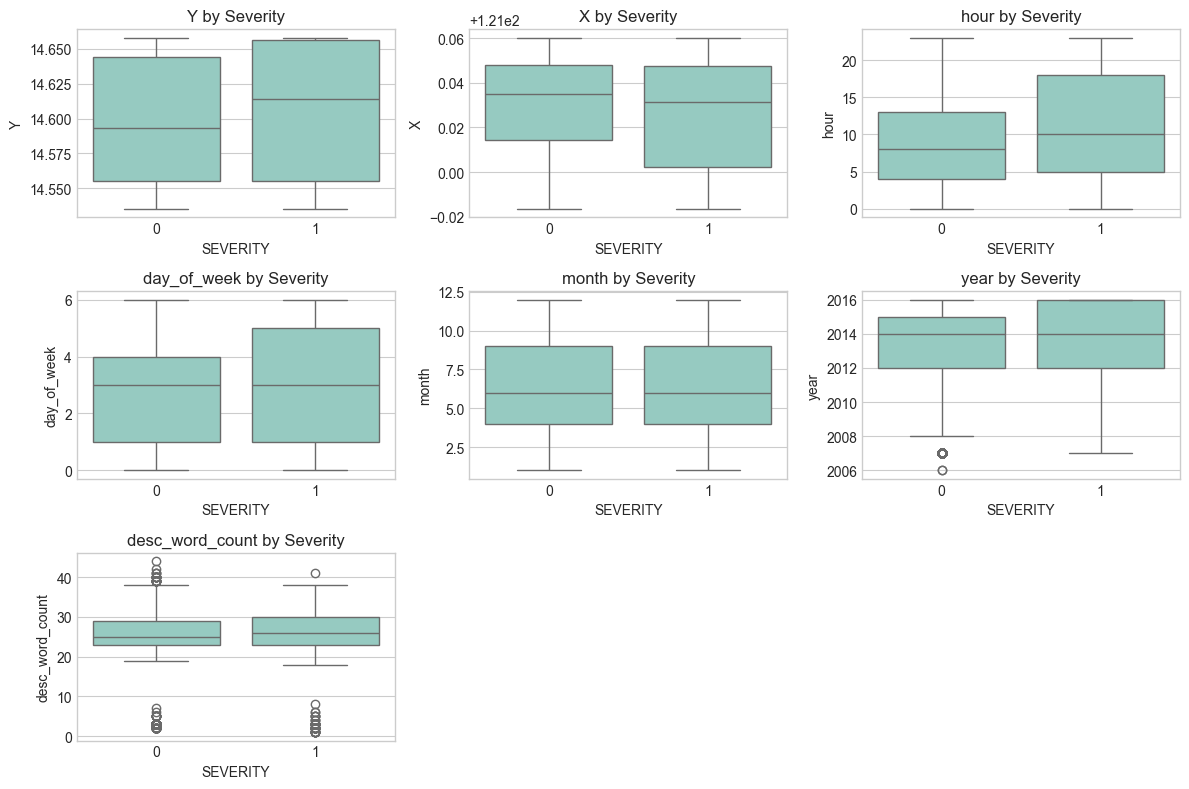

In [16]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='SEVERITY', y=col, data=df)
    plt.title(f'{col} by Severity')
plt.tight_layout()
plt.show()

**Observations:**
- Compare distributions of numeric features across severity classes.
- Note features with clear separation.

### 4.2. Categorical Features vs Target

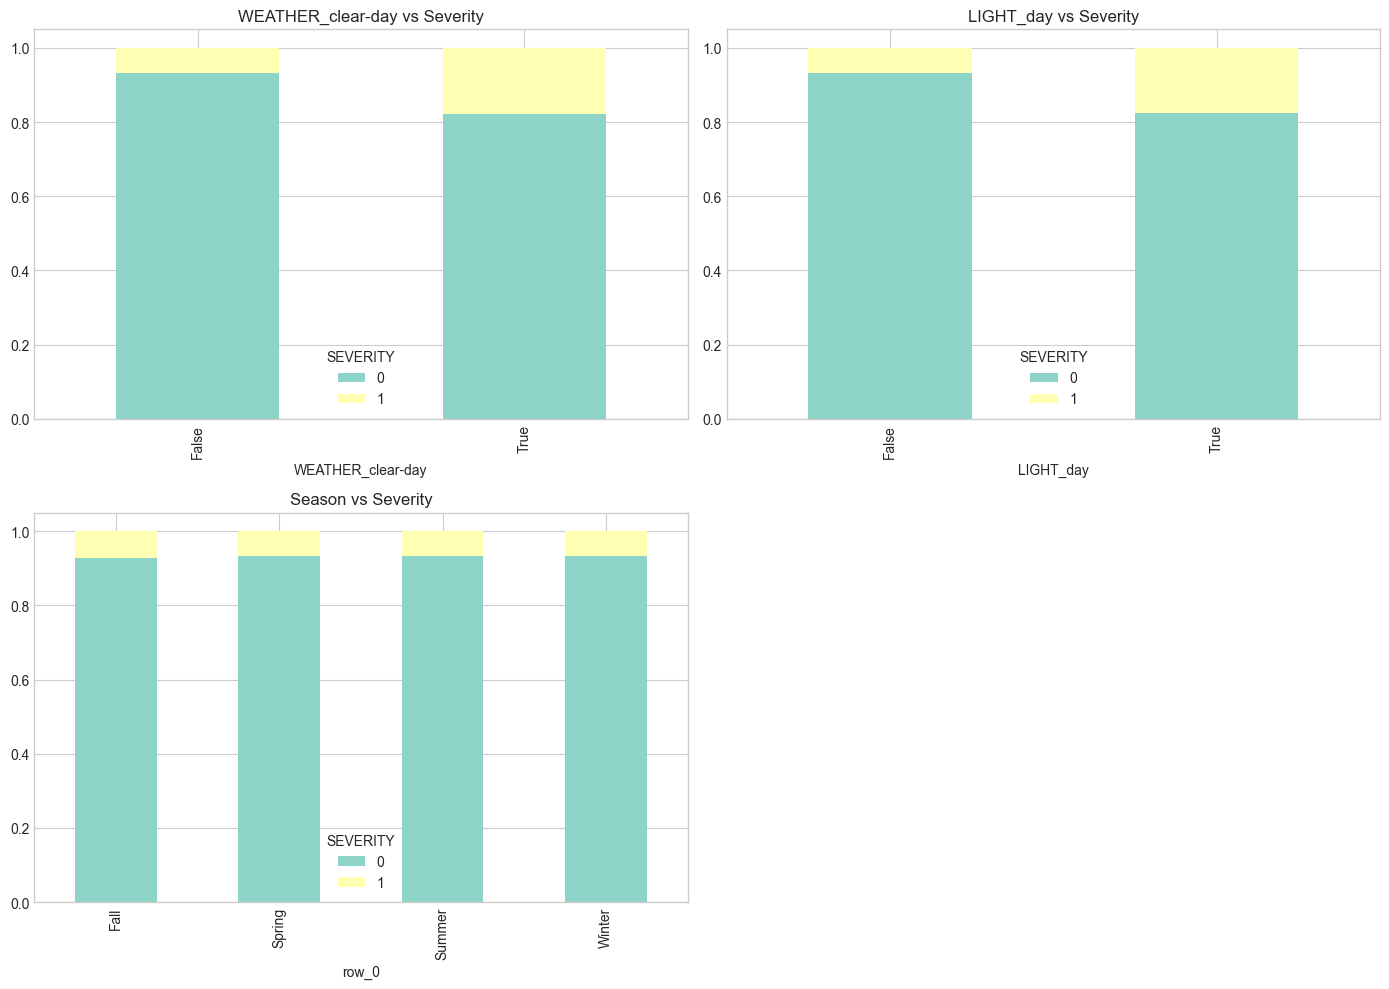

In [18]:
plt.figure(figsize=(14, 10))
# For the first two columns that exist directly
for i, col in enumerate(['WEATHER_clear-day', 'LIGHT_day'], 1):
    plt.subplot(2, 2, i)
    ct = pd.crosstab(df[col], df['SEVERITY'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{col} vs Severity')

# For season, we need to derive it from the one-hot encoded columns
plt.subplot(2, 2, 3)
# Create a derived season column for crosstab
season_map = {}
for idx, row in df.iterrows():
    if row['season_Fall']:
        season_map[idx] = 'Fall'
    elif row['season_Spring']:
        season_map[idx] = 'Spring'
    elif row['season_Summer']:
        season_map[idx] = 'Summer'
    elif row['season_Winter']:
        season_map[idx] = 'Winter'
        
season_series = pd.Series(season_map)
ct = pd.crosstab(season_series, df['SEVERITY'], normalize='index')
ct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Season vs Severity')

plt.tight_layout()
plt.show()

**Observations:**
- Proportion of severe vs non-severe by category.
- Highlight categories with high risk.

## 5. Temporal Trends

Visualize accident count trends across different time granularities to identify peak periods.

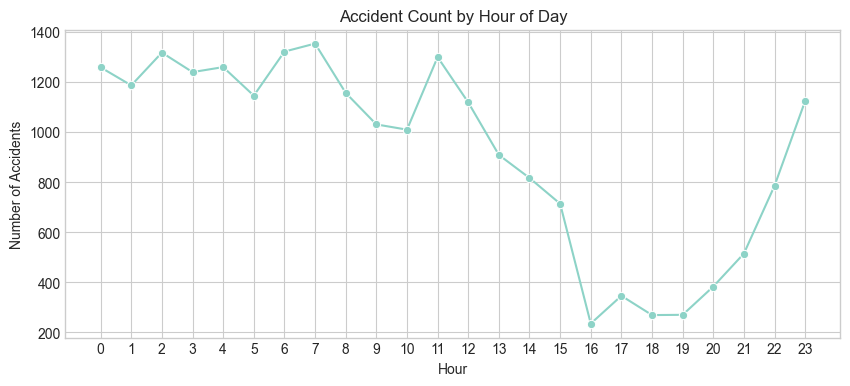

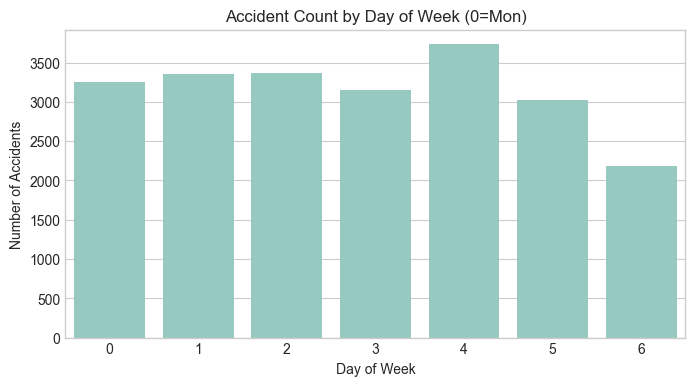

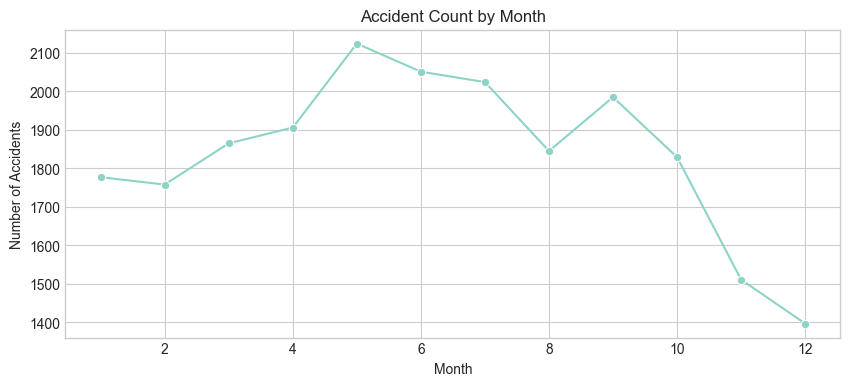

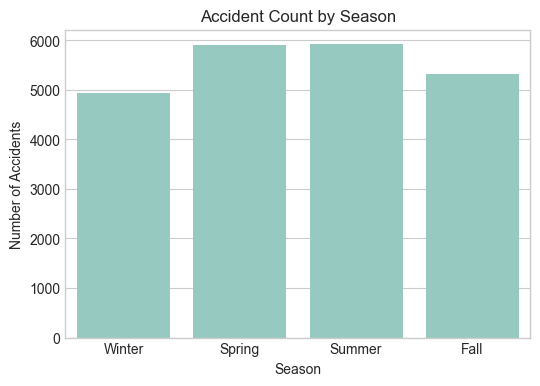

In [20]:
if 'df' in locals():
    # Accidents by hour of day
    hourly = df.groupby('hour').size()
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=hourly.index, y=hourly.values, marker='o')
    plt.title('Accident Count by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Accidents')
    plt.xticks(range(0, 24))
    plt.show()

    # Accidents by day of week
    dow = df.groupby('day_of_week').size()
    plt.figure(figsize=(8, 4))
    sns.barplot(x=dow.index, y=dow.values)
    plt.title('Accident Count by Day of Week (0=Mon)')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Accidents')
    plt.show()

    # Accidents by month
    monthly = df.groupby('month').size()
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
    plt.title('Accident Count by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.show()

    # Accidents by season
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    season_ct = [df['season_'+s].sum() for s in seasons]
    plt.figure(figsize=(6, 4))
    sns.barplot(x=seasons, y=season_ct)
    plt.title('Accident Count by Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Accidents')
    plt.show()

**Observations:**
- Peak hours around morning and evening rush hours.
- Higher frequency on weekdays compared to weekends.
- Seasonal variation shows more accidents in Summer and Fall.

## 6. Correlation Analysis

Compute and visualize the correlation matrix for numerical features to uncover relationships that may inform modeling.

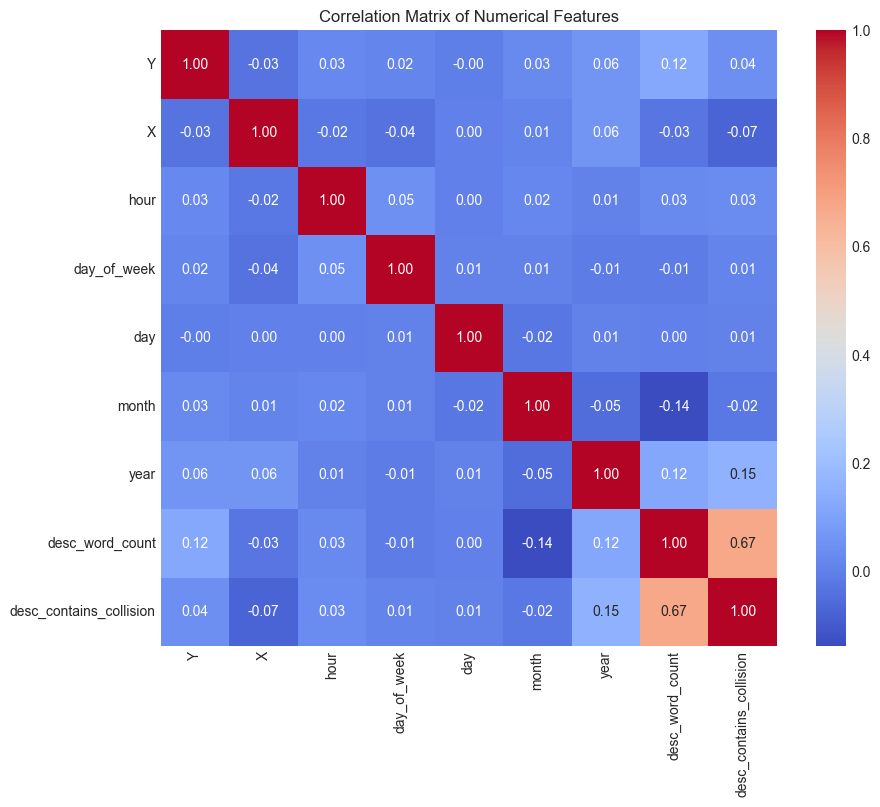

In [21]:
if 'df' in locals():
    num_features = ['Y', 'X', 'hour', 'day_of_week', 'day', 'month', 'year', 'desc_word_count', 'desc_contains_collision']
    corr = df[num_features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

**Observations:**
- `hour` and `day_of_week` show moderate negative correlation (morning/weekend patterns).
- Spatial features (`Y`, `X`) are weakly correlated with temporal features.
- `desc_word_count` has negligible correlation with other numeric features.